In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
print(tf.__version__)

2.0.0


In [3]:
# 下载 IMDB 数据集 (Internet Movie Database)
imdb = keras.datasets.imdb
# num_words = 1000, 保留了训练数据中最常出现的 10,000 个单词。为了保持数据规模的可管理性，低频词将被丢弃。
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


In [5]:
# 标签0代表消极评论，1代表积极评论
# train_data中，文本被转换成整数值，每个整数代表评论中的一个单词
train_labels[0], train_data[0]

(1,
 [1,
  14,
  22,
  16,
  43,
  530,
  973,
  1622,
  1385,
  65,
  458,
  4468,
  66,
  3941,
  4,
  173,
  36,
  256,
  5,
  25,
  100,
  43,
  838,
  112,
  50,
  670,
  2,
  9,
  35,
  480,
  284,
  5,
  150,
  4,
  172,
  112,
  167,
  2,
  336,
  385,
  39,
  4,
  172,
  4536,
  1111,
  17,
  546,
  38,
  13,
  447,
  4,
  192,
  50,
  16,
  6,
  147,
  2025,
  19,
  14,
  22,
  4,
  1920,
  4613,
  469,
  4,
  22,
  71,
  87,
  12,
  16,
  43,
  530,
  38,
  76,
  15,
  13,
  1247,
  4,
  22,
  17,
  515,
  17,
  12,
  16,
  626,
  18,
  2,
  5,
  62,
  386,
  12,
  8,
  316,
  8,
  106,
  5,
  4,
  2223,
  5244,
  16,
  480,
  66,
  3785,
  33,
  4,
  130,
  12,
  16,
  38,
  619,
  5,
  25,
  124,
  51,
  36,
  135,
  48,
  25,
  1415,
  33,
  6,
  22,
  12,
  215,
  28,
  77,
  52,
  5,
  14,
  407,
  16,
  82,
  2,
  8,
  4,
  107,
  117,
  5952,
  15,
  256,
  4,
  2,
  7,
  3766,
  5,
  723,
  36,
  71,
  43,
  530,
  476,
  26,
  400,
  317,
  46,
  7,
  4,
  2,
  1029

In [6]:
# 每一条评论的文本长度不同
len(train_data[0]), len(train_data[1])

(218, 189)

In [7]:
# 了解将整数转换回文本
word_index_ = imdb.get_word_index()

In [8]:
len(word_index_)

88584

In [9]:
# 修改索引记录
word_index = {k: (v + 3) for k, v in word_index_.items()}
# 添加特殊的几个标签
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2 
word_index["<UNUSED>"] = 3

In [10]:
# 把键和值调换
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [11]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [12]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [13]:
'''
准备数据，可以有两种方案：
影评（整数数组）==> 张量（Tensor)
方案1： 加载数据是关键词为10000个，类似one-hot编码处理，
        则网络首层需要 num_words * num_reviews 的矩阵，即(10000 * 25000)
        这将会需要大量的内存
方案2： 填充数据来保证输入具有相同的长度
        则网络首层需要 max_length * num_reviews 的矩阵， max_length 是一个相对小很多的值
        因此采取此方案更合理

'''
None

In [14]:
# 使用 pad_sequences 使长度标准化
train_data2 = keras.preprocessing.sequence.pad_sequences(
    train_data,
    value=word_index["<PAD>"], # 使用0填充
    padding="post", # 在末尾添加
    maxlen=256
)
test_data2 = keras.preprocessing.sequence.pad_sequences(
    test_data,
    value=word_index["<PAD>"],
    padding='post',
    maxlen=256
)

In [15]:
train_data2.shape, train_data.shape, train_data2[0]

((25000, 256),
 (25000,),
 array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
        4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
         838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
           4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
        1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
         147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
          71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
           4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
          62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
          16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
           5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
          22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
           2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
        3766

In [16]:
# 构建模型

# 词汇数目
vocab_size = 10000
model = keras.Sequential()
# 采用整数编码的词汇表，并查找每个词索引的嵌入向量(embedding vector)
# 得到维度 (batch sequence , embedding)
model.add(keras.layers.Embedding(vocab_size, 16))
# 对序列维度求平均值来为每个样本返回一个定长输出向量。
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 编译
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [18]:
# 创建验证集
x_val = train_data2[:10000]
partial_x_train = train_data2[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [19]:
# 训练模型
# 以512个样本的mini-batch大小迭代40个epoch来训练模型
# 0, 1, or 2. Verbosity mode. 
# 0 = silent, 1 = progress bar, 2 = one line per epoch. 
# Note that the progress bar is not particularly useful when logged to a file, so verbose=2 is recommended when not running interactively (eg, in a production environment)
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=40,
    batch_size=512,
    validation_data=(x_val, y_val),
    verbose=1
)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 2s 115us/sample - loss: 0.6917 - accuracy: 0.5164 - val_loss: 0.6888 - val_accuracy: 0.5534
Epoch 2/40
15000/15000 [==============================] - 1s 49us/sample - loss: 0.6848 - accuracy: 0.6319 - val_loss: 0.6797 - val_accuracy: 0.6371
Epoch 3/40
15000/15000 [==============================] - 1s 49us/sample - loss: 0.6708 - accuracy: 0.7012 - val_loss: 0.6623 - val_accuracy: 0.7040
Epoch 4/40
15000/15000 [==============================] - 1s 49us/sample - loss: 0.6471 - accuracy: 0.7473 - val_loss: 0.6353 - val_accuracy: 0.7310
Epoch 5/40
15000/15000 [==============================] - 1s 49us/sample - loss: 0.6130 - accuracy: 0.7837 - val_loss: 0.5999 - val_accuracy: 0.7776
Epoch 6/40
15000/15000 [==============================] - 1s 49us/sample - loss: 0.5706 - accuracy: 0.8123 - val_loss: 0.5589 - val_accuracy: 0.8101
Epoch 7/40
15000/15000 [==============================]

In [20]:
# 评估模型
results = model.evaluate(test_data2, test_labels, verbose=2)

25000/1 - 1s - loss: 0.3383 - accuracy: 0.8720


In [21]:
# 创建准确率和损失值随epoch变化的图表

history_dict = history.history


In [22]:
import matplotlib.pyplot as plt

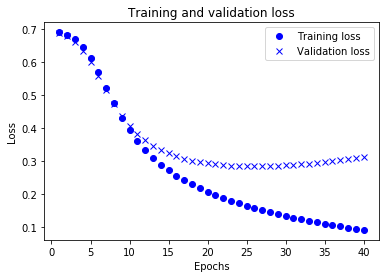

In [28]:

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# “bo”代表 "蓝点"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b代表“蓝色实线”
plt.plot(epochs, val_loss, 'bx', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

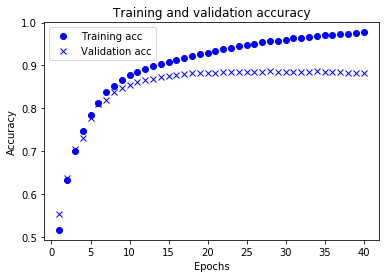

In [29]:
plt.clf()   # Clear the current figure.

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'bx', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [31]:
partial_x_train.shape

(15000, 256)